In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [125]:
DataFrame = pd.read_csv("Titanic-Dataset.csv")
DataFrame.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [126]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
DataFrame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
DataFrame.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
375,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN


In [129]:
df_isnull = DataFrame.isnull().sum()
df_isnull[df_isnull > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [130]:
DataFrame_New = DataFrame.drop(columns=['Cabin','PassengerId','Name','Ticket'],axis=1)

In [131]:
df_isnull = DataFrame_New.isnull().sum()
df_isnull[df_isnull > 0]

Age         177
Embarked      2
dtype: int64

In [132]:
DataFrame_New['Age'] = DataFrame_New['Age'].fillna(DataFrame_New['Age'].median())

In [133]:
df_isnull = DataFrame_New.isnull().sum()
df_isnull[df_isnull > 0]

Embarked    2
dtype: int64

In [134]:
DataFrame_New['Embarked'] = DataFrame_New['Embarked'].fillna('unknow')

In [135]:
df_isnull = DataFrame_New.isnull().sum()
df_isnull[df_isnull > 0]

Series([], dtype: int64)

In [136]:
DataFrame_New.duplicated().sum()

np.int64(116)

In [137]:
DataFrame_New = DataFrame_New.drop_duplicates()

In [138]:
DataFrame_New.duplicated().sum()

np.int64(0)

In [139]:
DataFrame_New.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,34.878403
std,0.492674,0.853574,13.766359,0.990326,0.840565,52.408474
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.197900
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


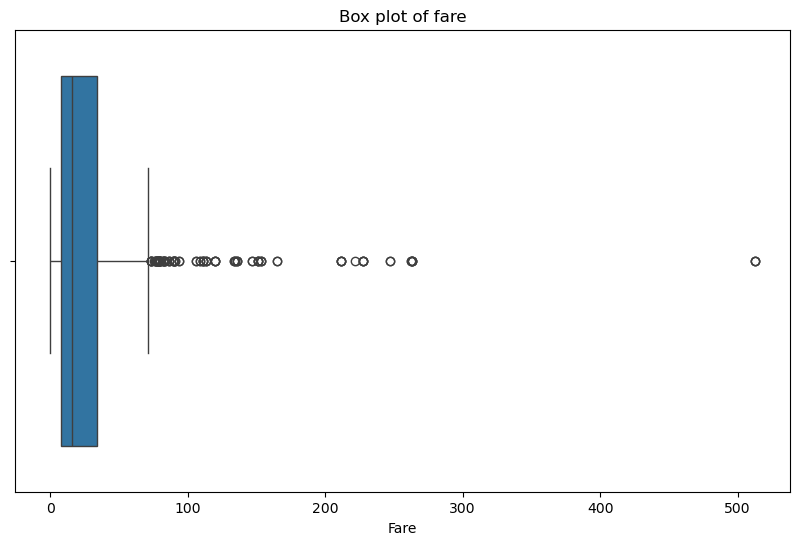

In [140]:
plt.figure(figsize=(10,6))
sns.boxplot(x=DataFrame_New['Fare'])
plt.title("Box plot of fare")
plt.show()

In [141]:
DataFrame_New['Fare_log'] = np.log1p(DataFrame_New['Fare'])

In [142]:
DataFrame_New[['Fare','Fare_log']].head()

,Fare,Fare_log
0,7.2500,2.110213
1,71.2833,4.280593
2,7.9250,2.188856
3,53.1000,3.990834
4,8.0500,2.202765


In [143]:
DataFrame_New['Fare_log'].describe()

count    775.000000
mean       3.046884
std        0.962382
min        0.000000
25%        2.202765
50%        2.827314
75%        3.560974
max        6.240917
Name: Fare_log, dtype: float64

In [144]:
DataFrameNew = DataFrame_New.drop(columns=['Fare'],axis=1)

In [145]:
DataFrameNew.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare_log
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,0.412903,2.246452,29.581187,0.529032,0.420645,3.046884
std,0.492674,0.853574,13.766359,0.990326,0.840565,0.962382
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,2.202765
50%,0.000000,3.000000,28.000000,0.000000,0.000000,2.827314
75%,1.000000,3.000000,36.000000,1.000000,1.000000,3.560974
max,1.000000,3.000000,80.000000,8.000000,6.000000,6.240917


In [146]:
scaler = StandardScaler()
DataFrameNew[['Age','Pclass','SibSp','Parch','Fare_log']] = scaler.fit_transform(DataFrameNew[['Age','Pclass','SibSp','Parch','Fare_log']])

In [147]:
DataFrameNew.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare_log
count,775.000000,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02,7.750000e+02
mean,0.412903,-1.696134e-16,2.521281e-16,-3.208903e-17,1.375244e-17,-5.730183e-17
std,0.492674,1.000646e+00,1.000646e+00,1.000646e+00,1.000646e+00,1.000646e+00
min,0.000000,-1.461216e+00,-2.119661e+00,-5.345452e-01,-5.007545e-01,-3.168027e+00
25%,0.000000,-1.461216e+00,-6.237473e-01,-5.345452e-01,-5.007545e-01,-8.776813e-01
50%,0.000000,8.833855e-01,-1.149330e-01,-5.345452e-01,-5.007545e-01,-2.283006e-01
75%,1.000000,8.833855e-01,4.665691e-01,4.758756e-01,6.896894e-01,5.345297e-01
max,1.000000,8.833855e-01,3.664831e+00,7.548821e+00,6.641909e+00,3.321027e+00


In [148]:
DataFrameNew.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,0,0.883385,male,-0.551060,0.475876,-0.500754,S,-0.973913
1,1,-1.461216,female,0.611945,0.475876,-0.500754,C,1.282761
2,1,0.883385,female,-0.260308,-0.534545,-0.500754,S,-0.892143
3,1,-1.461216,female,0.393881,0.475876,-0.500754,S,0.981481
4,0,0.883385,male,0.393881,-0.534545,-0.500754,S,-0.877681


In [149]:
kategori_fitur = DataFrameNew.select_dtypes(include=['object']).columns

In [150]:
df_one_hot = pd.get_dummies(DataFrameNew,columns=kategori_fitur,drop_first=True)
df_one_hot

,Survived,Pclass,Age,SibSp,Parch,Fare_log,Sex_male,Embarked_Q,Embarked_S,Embarked_unknow
0,0,0.883385,-0.551060,0.475876,-0.500754,-0.973913,True,False,True,False
1,1,-1.461216,0.611945,0.475876,-0.500754,1.282761,False,False,False,False
2,1,0.883385,-0.260308,-0.534545,-0.500754,-0.892143,False,False,True,False
3,1,-1.461216,0.393881,0.475876,-0.500754,0.981481,False,False,True,False
4,0,0.883385,0.393881,-0.534545,-0.500754,-0.877681,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...
885,0,0.883385,0.684632,-0.534545,5.451465,0.372724,False,True,False,False
887,1,-1.461216,-0.769123,-0.534545,-0.500754,0.402494,False,False,True,False
888,0,0.883385,-0.114933,0.475876,1.880133,0.155700,False,False,True,False
889,1,-1.461216,-0.260308,-0.534545,-0.500754,0.402494,True,False,False,False


In [151]:
for column in df_one_hot.columns:
  if df_one_hot[column].dtype == 'bool':
     df_one_hot[column] = df_one_hot[column].astype(int)

In [152]:
missing_values = df_one_hot.isnull().sum()
missing_percentage = (missing_values / len(df_one_hot)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,Missing Values,Percentage


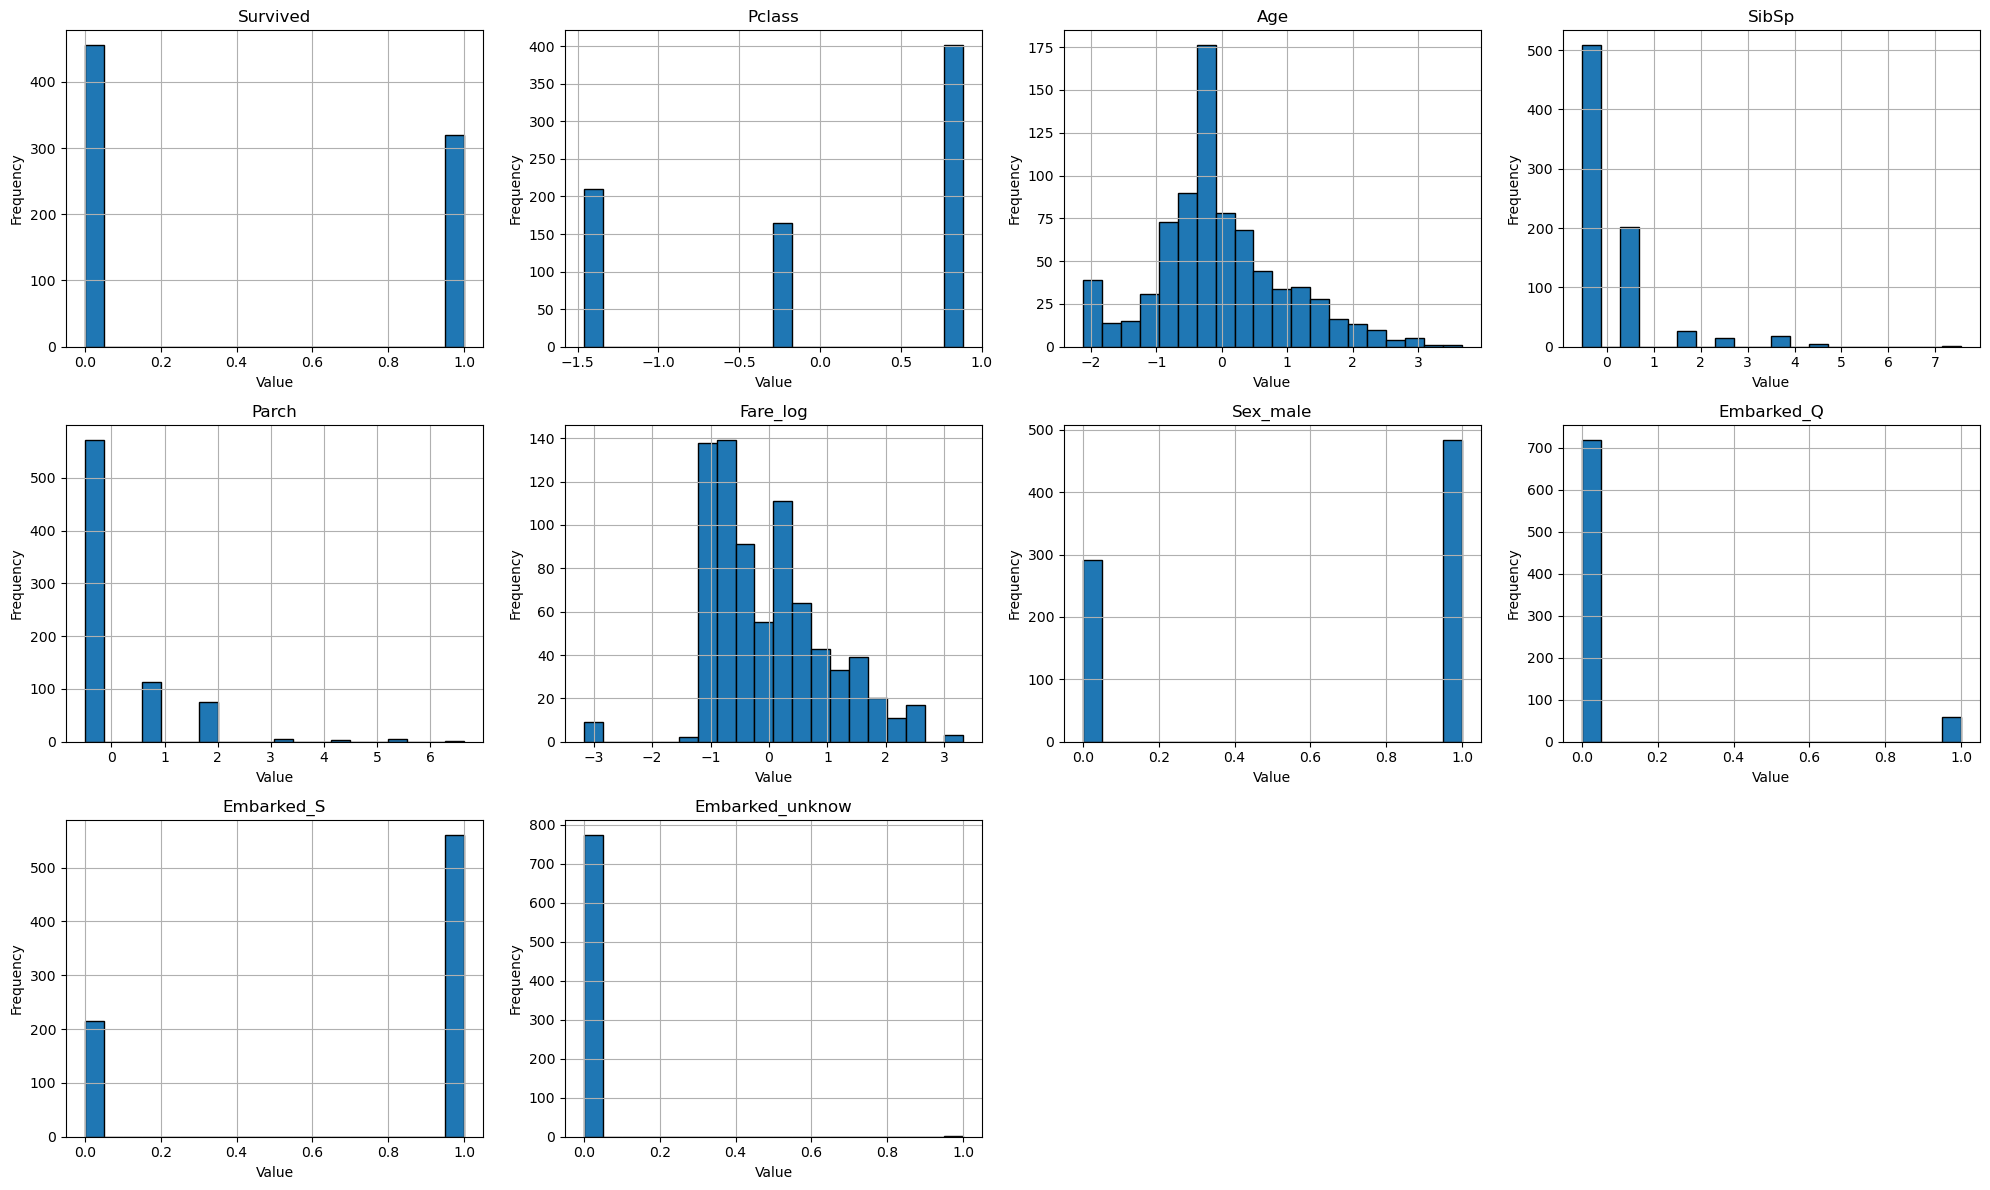

In [153]:
num_vars = df_one_hot.shape[1]

n_cols = 4 
n_rows = -(-num_vars // n_cols) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df_one_hot.columns):
    df_one_hot[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

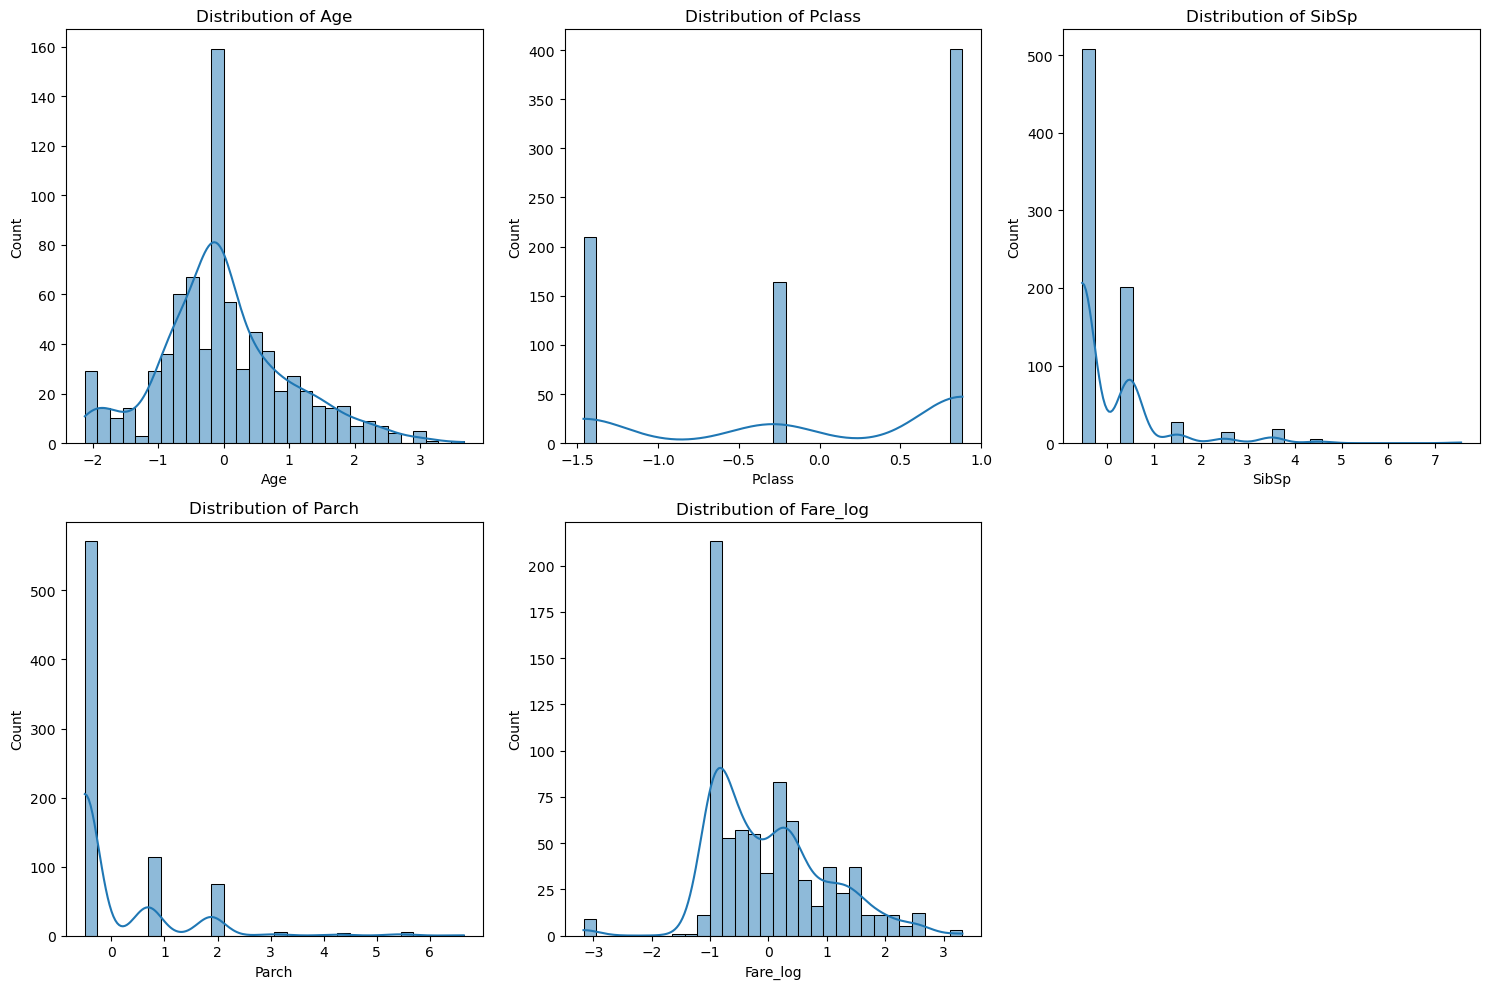

In [154]:
columns_to_plot = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare_log']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_one_hot[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

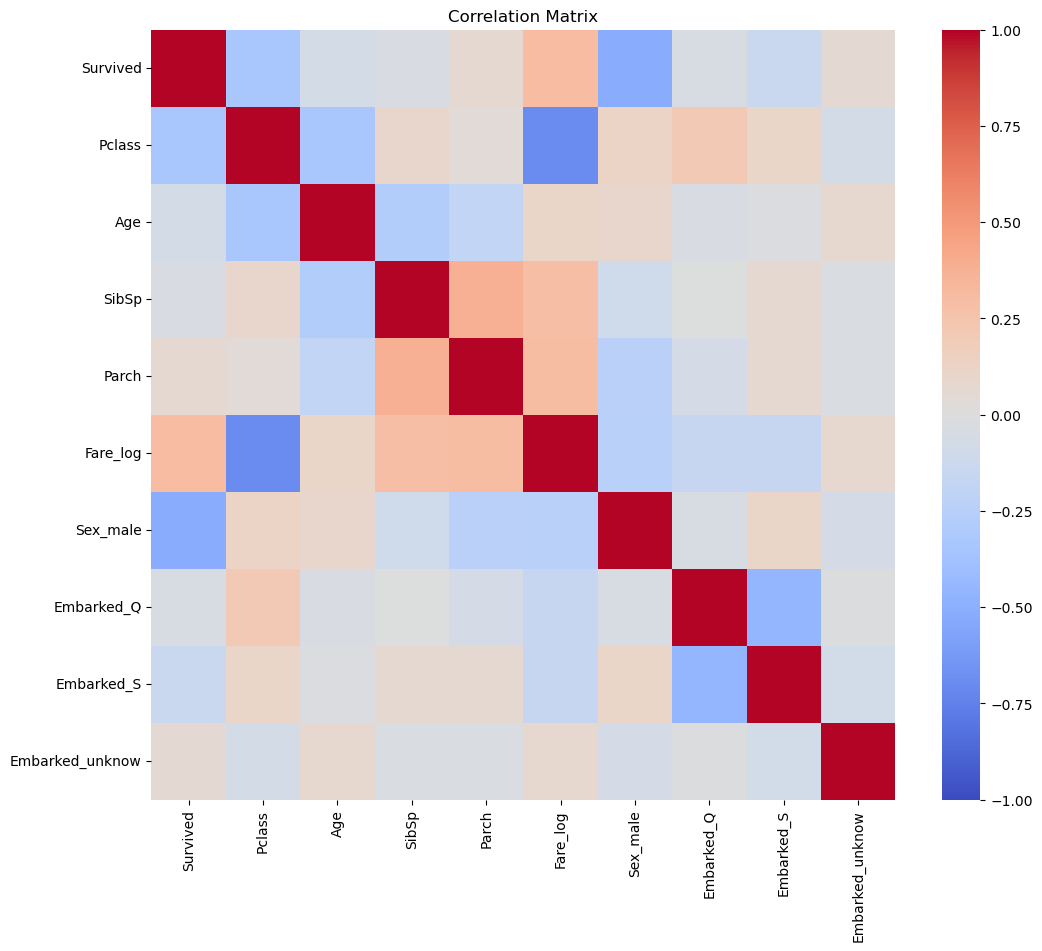

In [155]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_one_hot.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

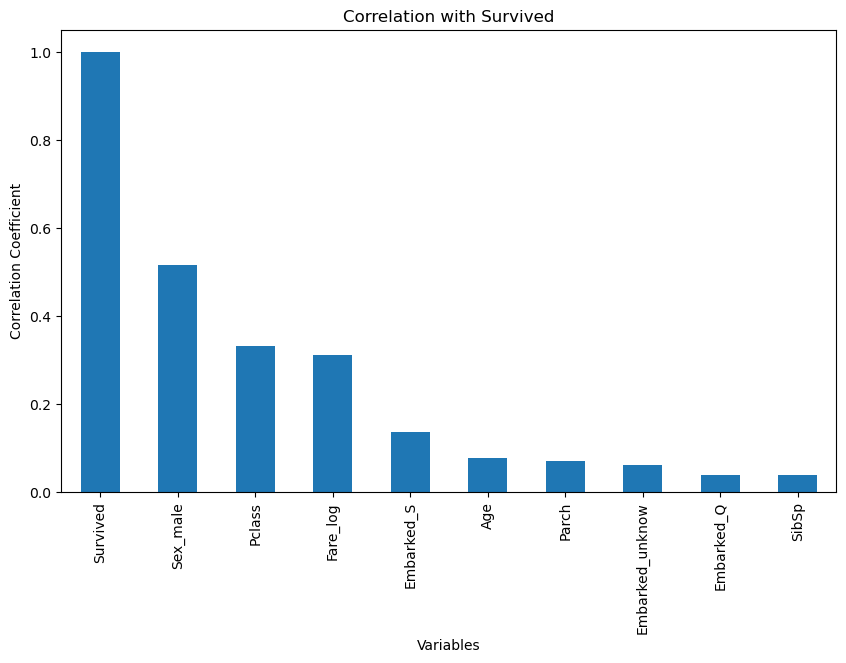

In [156]:
target_corr = df_one_hot.corr()['Survived']

target_corr_sorted = target_corr.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Survived')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

In [157]:
X = df_one_hot.drop(columns=['Survived'])
y = df_one_hot['Survived']

In [158]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [159]:
print("Jumlah data: ",len(X))
print("Jumlah data latih: ",len(x_train))
print("Jumlah data test: ",len(x_test))

Jumlah data:  775
Jumlah data latih:  620
Jumlah data test:  155


In [160]:
svm = SVC().fit(x_train,y_train)
rf = RandomForestClassifier().fit(x_train, y_train)

==== SVM Classifier ====
Confusion Matrix:
[[83 13]
 [22 37]]
True Positive (TP): 37
False Positive (FP): 13
False Negative (FN): 22
True Negative (TN): 83
Accuracy: 0.7742
Precision: 0.7400
Recall: 0.6271
F1-Score: 0.6789

----------------------------------------



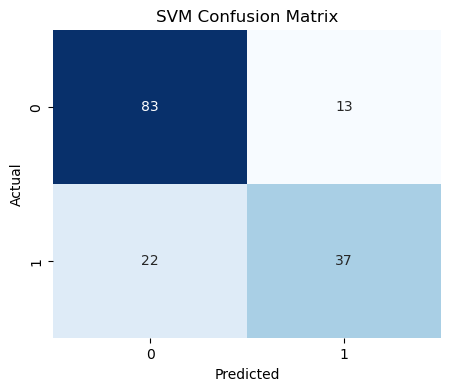

In [161]:
y_pred_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm_svm.ravel()
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Random Forest Classifier ====
Confusion Matrix:
[[75 21]
 [20 39]]
True Positive (TP): 39
False Positive (FP): 21
False Negative (FN): 20
True Negative (TN): 75
Accuracy: 0.7355
Precision: 0.6500
Recall: 0.6610
F1-Score: 0.6555

----------------------------------------



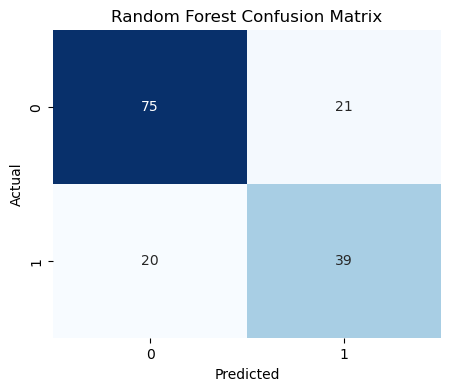

In [162]:
y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm_rf.ravel()
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Negative (TN): {tn}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()